In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.columns


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
vdf.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [8]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [9]:
df["CarName"].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [10]:
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porschce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})


In [11]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

AttributeError: Text.set() got an unexpected keyword argument 'rotaion'

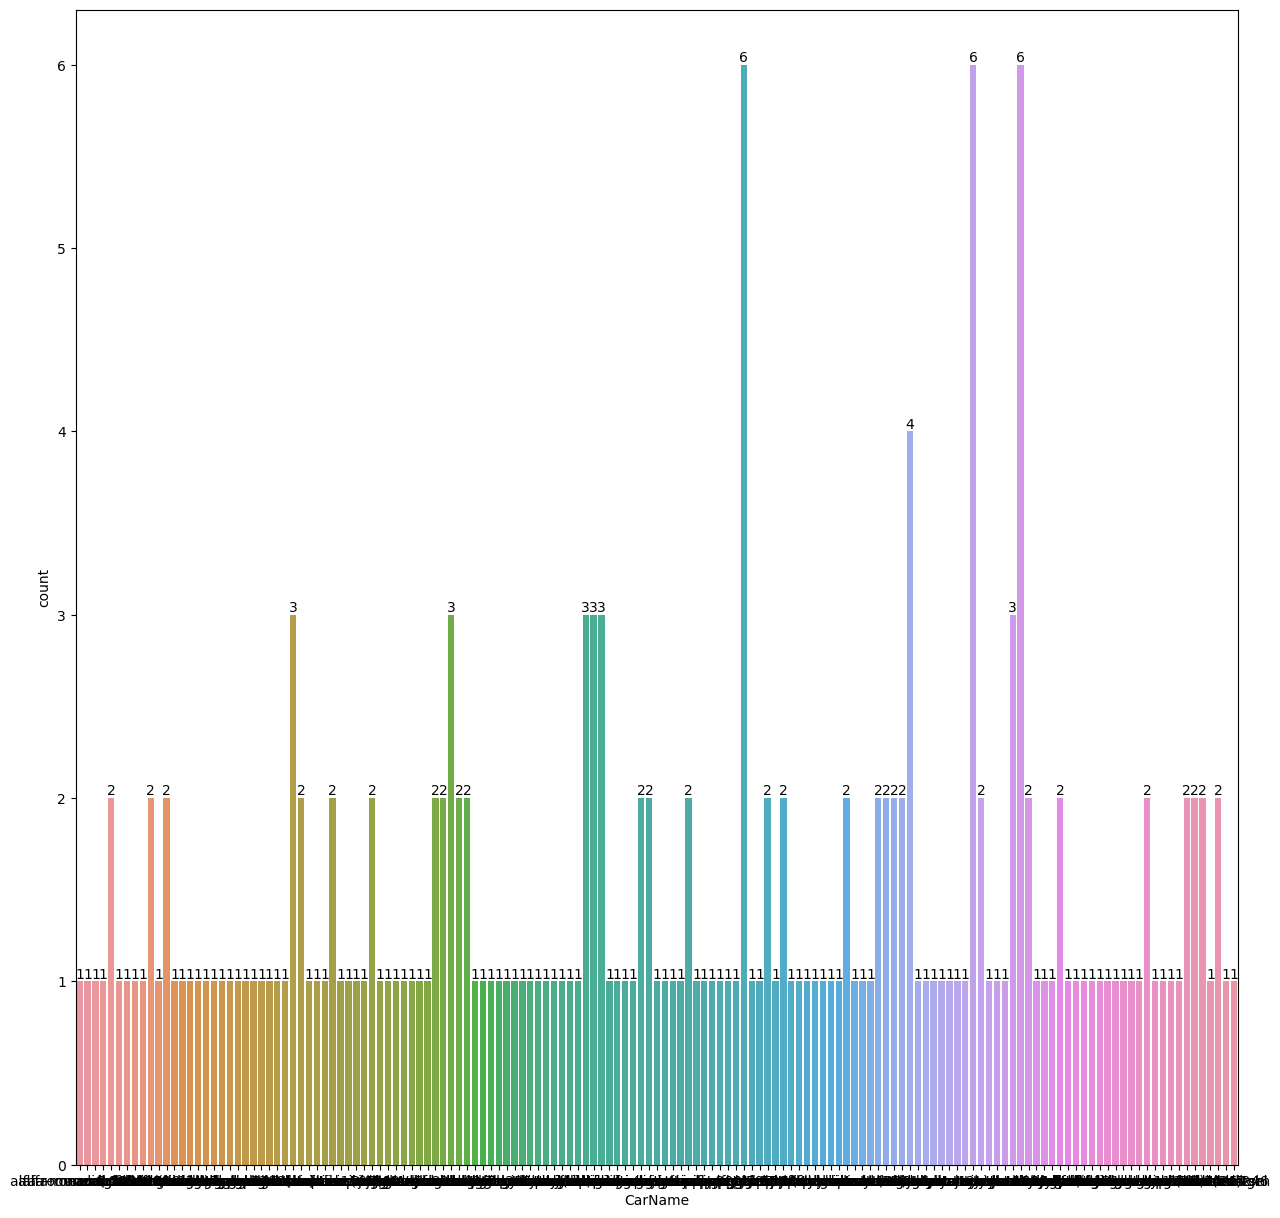

In [12]:
plt.figure(figsize=(15,15))
ax=sns.countplot(x=df["CarName"]);
ax.bar_label(ax.containers[0]);
plt.xticks(rotaion=90);

C:\Users\fahda\AppData\Local\Temp\ipykernel_10952\241947127.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


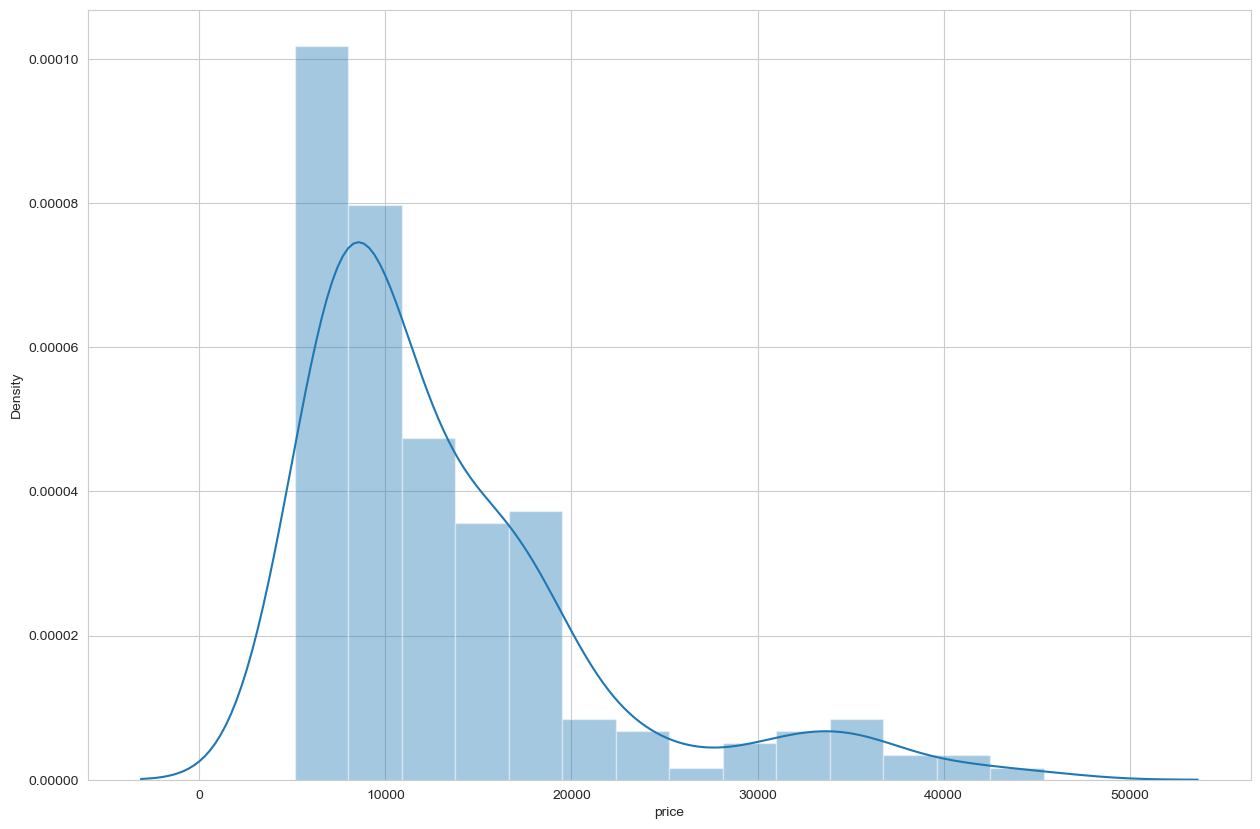

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.distplot(df.price)
plt.show()


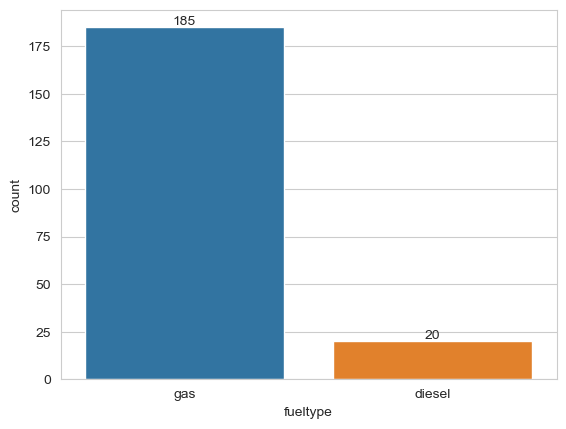

In [14]:
ax=sns.countplot(x=df['fueltype']);
ax.bar_label(ax.containers[0]);


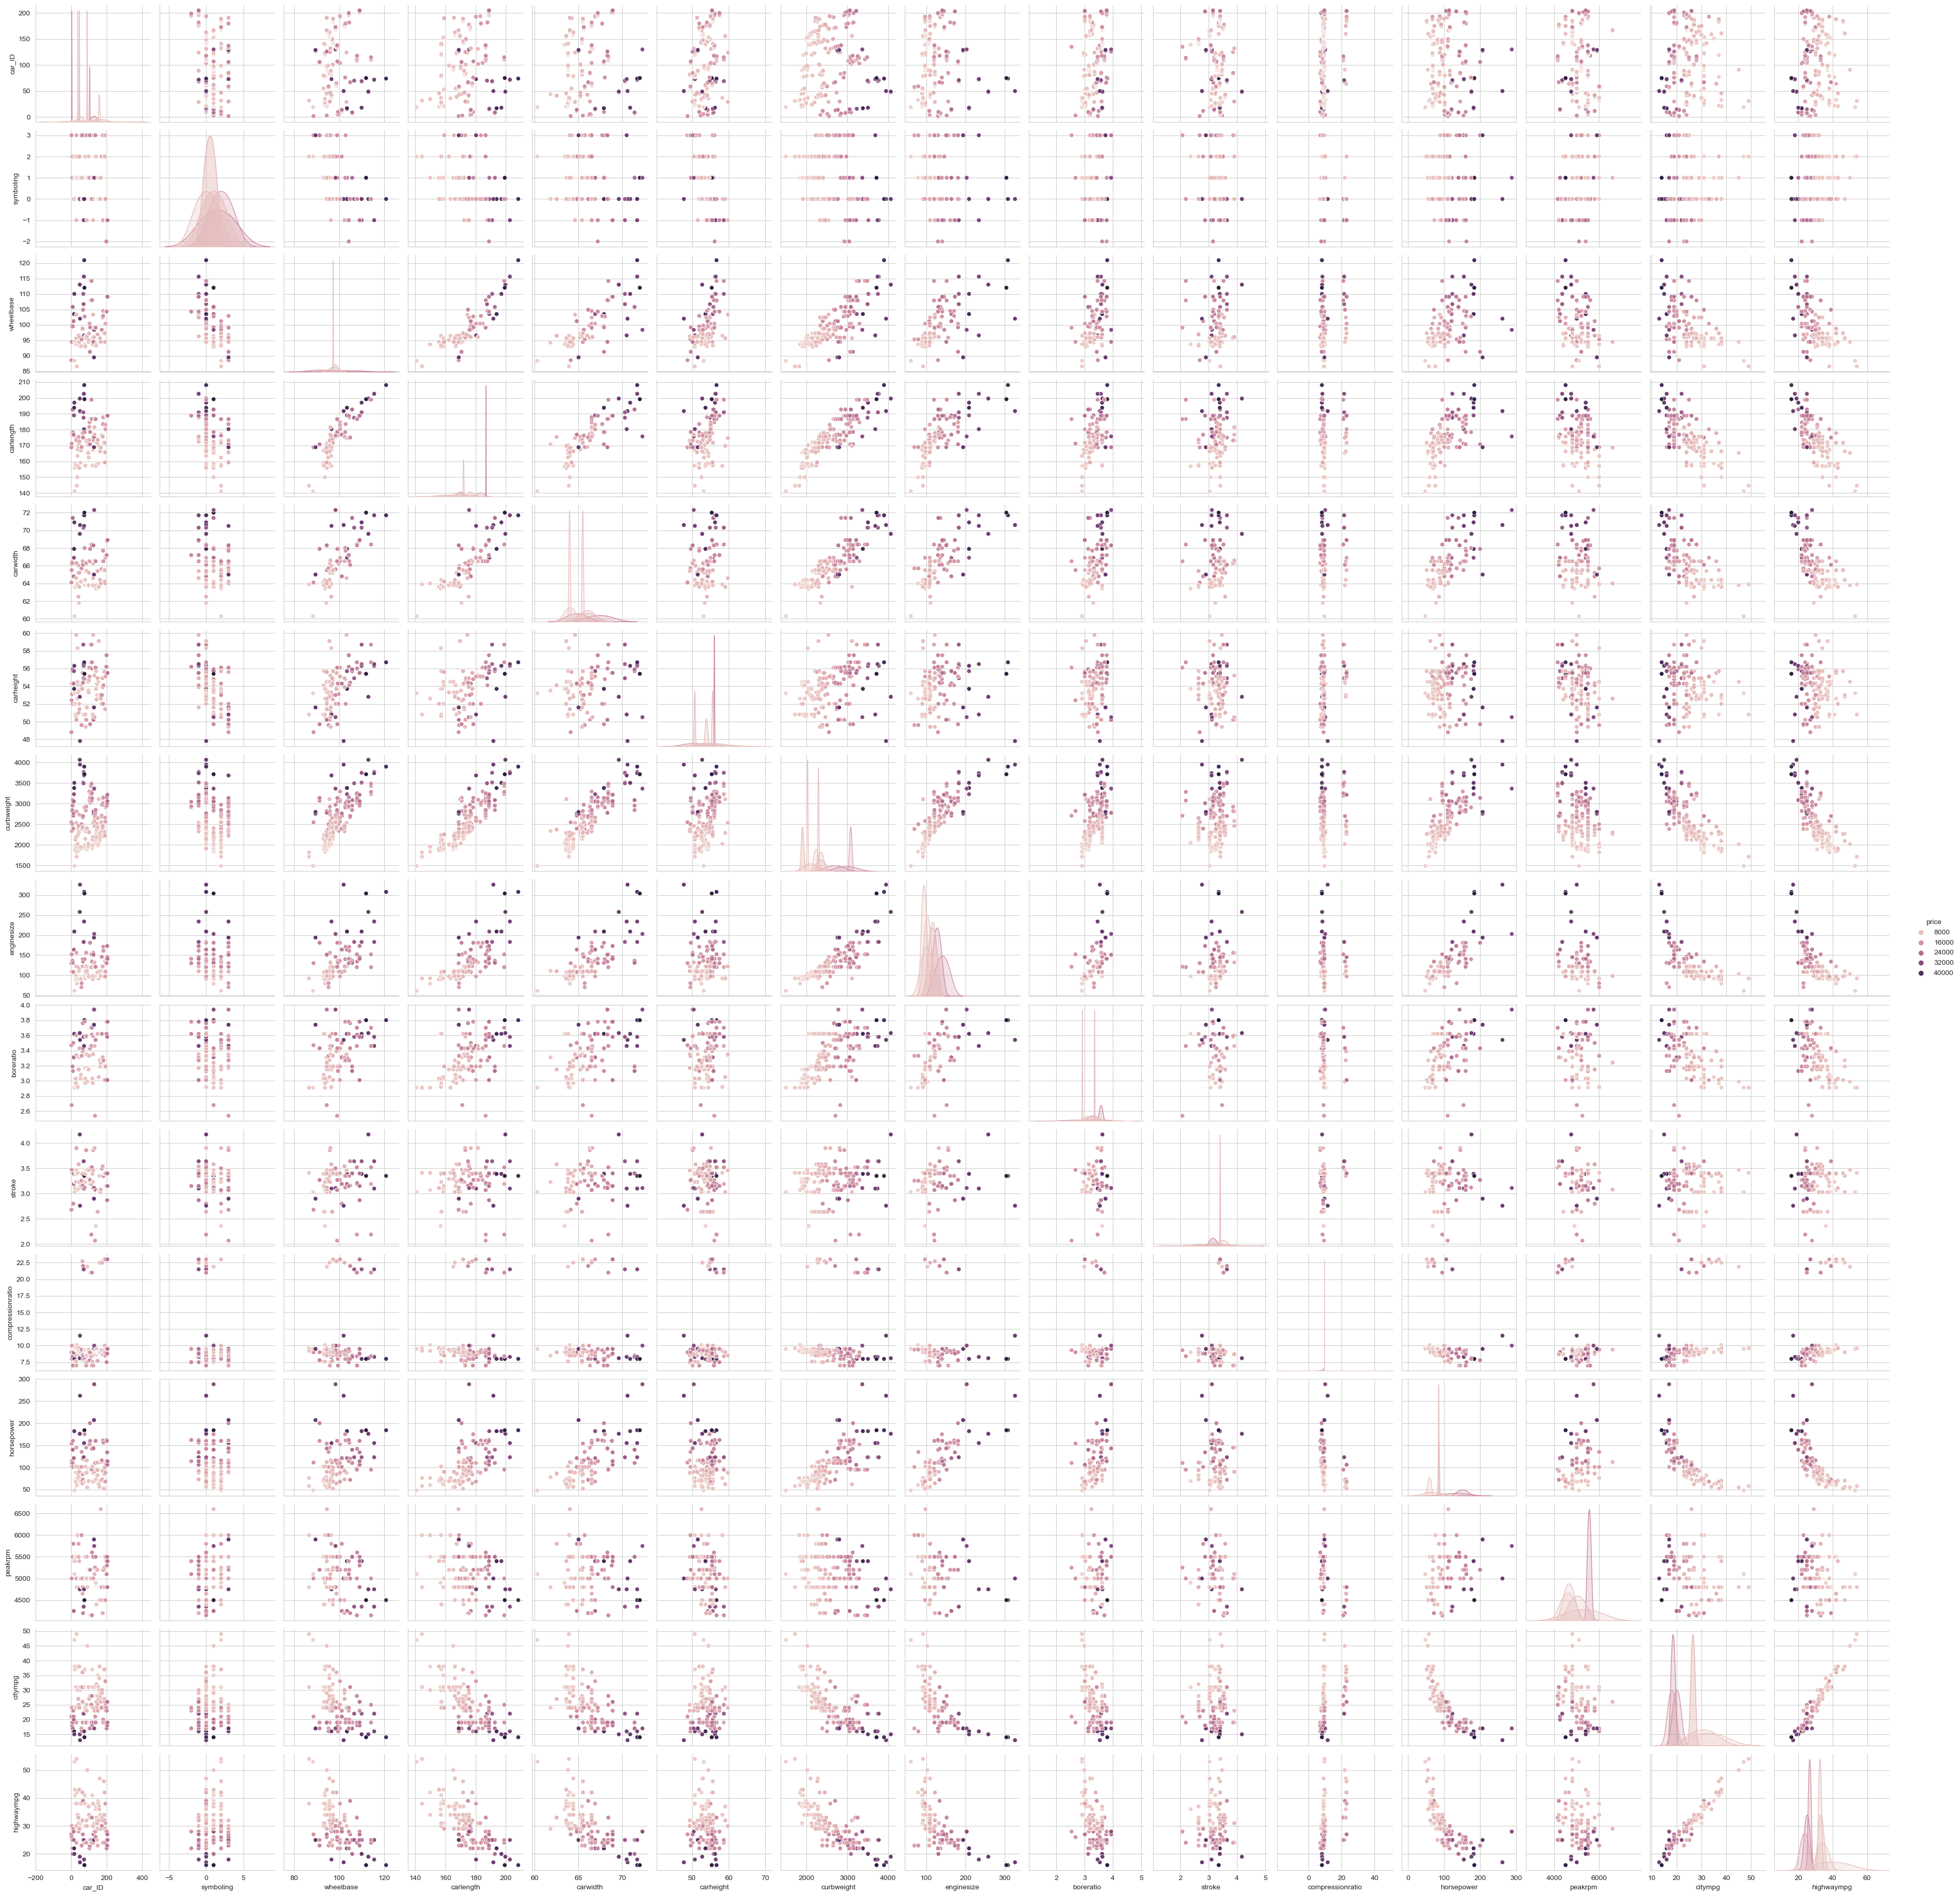

In [15]:
import seaborn as sns
sns.pairplot(df,markers=None,hue='price')
plt.show()


In [16]:
new_df = df [['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem','wheelbase',
             'carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']]

new_df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginetype,cylindernumber,fuelsystem,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0
1,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0
2,gas,std,two,hatchback,rwd,ohcv,six,mpfi,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0
3,gas,std,four,sedan,fwd,ohc,four,mpfi,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0
4,gas,std,four,sedan,4wd,ohc,five,mpfi,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0


In [17]:
new_df = pd.get_dummies(columns=['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'],data=new_df)

new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
scaler = StandardScaler()
num_cols = ['wheelbase',
             'carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg']

new_df[num_cols] = scaler.fit_transform(new_df[num_cols])


In [19]:
x = new_df.drop(columns=['price'])
y = new_df['price']
x.shape

(205, 45)

In [20]:
y.shape

(205,)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
training_score= []
testing_score= []

In [23]:
from sklearn.metrics import r2_score

def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f'r2_score of (model) model on Training Data is:',a)
    print(f'r2_score of (model) model on Testing Data is:',b)
        

In [24]:
from sklearn.linear_model import LinearRegression
model_prediction(LinearRegression())

r2_score of (model) model on Training Data is: 92.52761715043437
r2_score of (model) model on Testing Data is: 88.66738397403334


In [25]:
from sklearn.tree import DecisionTreeRegressor
model_prediction(DecisionTreeRegressor())

r2_score of (model) model on Training Data is: 99.86537119069865
r2_score of (model) model on Testing Data is: 90.01411926354209


In [26]:
from sklearn.ensemble import RandomForestRegressor
model_prediction(RandomForestRegressor())

r2_score of (model) model on Training Data is: 98.62562293963951
r2_score of (model) model on Testing Data is: 95.30011220117373


In [27]:
!pip install CatBoost

In [28]:
from catboost import CatBoostRegressor
model_prediction(CatBoostRegressor())


Learning rate set to 0.03077
0:	learn: 7580.5422243	total: 175ms	remaining: 2m 55s
1:	learn: 7429.9269859	total: 179ms	remaining: 1m 29s
2:	learn: 7296.8055188	total: 182ms	remaining: 1m
3:	learn: 7147.9379280	total: 185ms	remaining: 46s
4:	learn: 7008.7330241	total: 188ms	remaining: 37.4s
5:	learn: 6883.3328383	total: 191ms	remaining: 31.7s
6:	learn: 6765.1449710	total: 194ms	remaining: 27.5s
7:	learn: 6657.2288828	total: 197ms	remaining: 24.4s
8:	learn: 6527.8974321	total: 200ms	remaining: 22s
9:	learn: 6405.7431901	total: 203ms	remaining: 20.1s
10:	learn: 6301.6580196	total: 205ms	remaining: 18.5s
11:	learn: 6174.3758704	total: 208ms	remaining: 17.1s
12:	learn: 6066.7720614	total: 212ms	remaining: 16.1s
13:	learn: 5951.3534834	total: 214ms	remaining: 15.1s
14:	learn: 5842.1149023	total: 217ms	remaining: 14.2s
15:	learn: 5732.7329153	total: 220ms	remaining: 13.5s
16:	learn: 5641.5649355	total: 222ms	remaining: 12.9s
17:	learn: 5537.3774499	total: 225ms	remaining: 12.3s
18:	learn: 543

225:	learn: 1257.5426185	total: 747ms	remaining: 2.56s
226:	learn: 1254.2894242	total: 750ms	remaining: 2.55s
227:	learn: 1249.5070151	total: 752ms	remaining: 2.55s
228:	learn: 1247.6105396	total: 754ms	remaining: 2.54s
229:	learn: 1245.8340557	total: 756ms	remaining: 2.53s
230:	learn: 1242.0611257	total: 758ms	remaining: 2.52s
231:	learn: 1240.2410004	total: 761ms	remaining: 2.52s
232:	learn: 1236.3608036	total: 764ms	remaining: 2.52s
233:	learn: 1234.1378703	total: 766ms	remaining: 2.51s
234:	learn: 1232.4064915	total: 768ms	remaining: 2.5s
235:	learn: 1225.7303495	total: 770ms	remaining: 2.49s
236:	learn: 1223.9041783	total: 773ms	remaining: 2.49s
237:	learn: 1218.3982275	total: 775ms	remaining: 2.48s
238:	learn: 1215.8852417	total: 778ms	remaining: 2.48s
239:	learn: 1214.7818047	total: 780ms	remaining: 2.47s
240:	learn: 1210.2563460	total: 783ms	remaining: 2.47s
241:	learn: 1209.2393105	total: 785ms	remaining: 2.46s
242:	learn: 1204.2333758	total: 787ms	remaining: 2.45s
243:	learn:

383:	learn: 957.9364297	total: 1.13s	remaining: 1.82s
384:	learn: 955.0301062	total: 1.14s	remaining: 1.81s
385:	learn: 952.8350027	total: 1.14s	remaining: 1.81s
386:	learn: 952.2424366	total: 1.14s	remaining: 1.81s
387:	learn: 948.3893313	total: 1.14s	remaining: 1.8s
388:	learn: 947.5920893	total: 1.15s	remaining: 1.8s
389:	learn: 947.1678627	total: 1.15s	remaining: 1.79s
390:	learn: 944.8728715	total: 1.15s	remaining: 1.79s
391:	learn: 944.6140719	total: 1.15s	remaining: 1.79s
392:	learn: 940.5944758	total: 1.15s	remaining: 1.78s
393:	learn: 937.9182612	total: 1.16s	remaining: 1.78s
394:	learn: 935.1231887	total: 1.16s	remaining: 1.77s
395:	learn: 934.8735260	total: 1.16s	remaining: 1.77s
396:	learn: 933.3980016	total: 1.16s	remaining: 1.77s
397:	learn: 930.8960417	total: 1.17s	remaining: 1.76s
398:	learn: 927.5475510	total: 1.17s	remaining: 1.76s
399:	learn: 926.9198716	total: 1.17s	remaining: 1.76s
400:	learn: 924.3067046	total: 1.17s	remaining: 1.75s
401:	learn: 921.4155801	total:

537:	learn: 725.1795166	total: 1.52s	remaining: 1.31s
538:	learn: 723.4542516	total: 1.52s	remaining: 1.3s
539:	learn: 722.5492038	total: 1.53s	remaining: 1.3s
540:	learn: 721.7803535	total: 1.53s	remaining: 1.3s
541:	learn: 720.4136297	total: 1.53s	remaining: 1.29s
542:	learn: 718.6827282	total: 1.53s	remaining: 1.29s
543:	learn: 717.0572014	total: 1.53s	remaining: 1.28s
544:	learn: 715.3921960	total: 1.53s	remaining: 1.28s
545:	learn: 713.6513741	total: 1.54s	remaining: 1.28s
546:	learn: 713.1106218	total: 1.54s	remaining: 1.27s
547:	learn: 712.5412871	total: 1.54s	remaining: 1.27s
548:	learn: 710.5932561	total: 1.54s	remaining: 1.27s
549:	learn: 710.2067274	total: 1.54s	remaining: 1.26s
550:	learn: 708.4950599	total: 1.55s	remaining: 1.26s
551:	learn: 708.1980247	total: 1.55s	remaining: 1.26s
552:	learn: 706.5381273	total: 1.55s	remaining: 1.25s
553:	learn: 704.4992394	total: 1.55s	remaining: 1.25s
554:	learn: 703.6111764	total: 1.55s	remaining: 1.25s
555:	learn: 703.2805194	total: 

713:	learn: 561.3975296	total: 1.9s	remaining: 763ms
714:	learn: 561.0112810	total: 1.91s	remaining: 760ms
715:	learn: 560.8640044	total: 1.91s	remaining: 757ms
716:	learn: 559.9498813	total: 1.91s	remaining: 754ms
717:	learn: 559.1066112	total: 1.91s	remaining: 751ms
718:	learn: 558.5182170	total: 1.91s	remaining: 748ms
719:	learn: 558.3486529	total: 1.92s	remaining: 745ms
720:	learn: 557.9523369	total: 1.92s	remaining: 742ms
721:	learn: 557.5773421	total: 1.92s	remaining: 739ms
722:	learn: 556.4079417	total: 1.92s	remaining: 736ms
723:	learn: 555.4194390	total: 1.92s	remaining: 733ms
724:	learn: 554.8974809	total: 1.92s	remaining: 730ms
725:	learn: 554.7498323	total: 1.93s	remaining: 727ms
726:	learn: 553.7761975	total: 1.93s	remaining: 724ms
727:	learn: 552.9041448	total: 1.93s	remaining: 722ms
728:	learn: 552.1726988	total: 1.93s	remaining: 719ms
729:	learn: 552.0201979	total: 1.94s	remaining: 716ms
730:	learn: 551.2251736	total: 1.94s	remaining: 713ms
731:	learn: 550.8366665	total

877:	learn: 483.4817890	total: 2.29s	remaining: 319ms
878:	learn: 483.4455356	total: 2.3s	remaining: 316ms
879:	learn: 483.2055876	total: 2.3s	remaining: 313ms
880:	learn: 483.1406395	total: 2.3s	remaining: 311ms
881:	learn: 482.7156333	total: 2.3s	remaining: 308ms
882:	learn: 482.3855378	total: 2.3s	remaining: 305ms
883:	learn: 481.8056680	total: 2.31s	remaining: 303ms
884:	learn: 481.6949233	total: 2.31s	remaining: 300ms
885:	learn: 481.5985312	total: 2.31s	remaining: 297ms
886:	learn: 481.5016978	total: 2.31s	remaining: 294ms
887:	learn: 480.7700810	total: 2.31s	remaining: 292ms
888:	learn: 480.5889640	total: 2.32s	remaining: 289ms
889:	learn: 480.1004837	total: 2.32s	remaining: 287ms
890:	learn: 479.7021151	total: 2.32s	remaining: 284ms
891:	learn: 479.4476326	total: 2.32s	remaining: 281ms
892:	learn: 478.9190071	total: 2.33s	remaining: 279ms
893:	learn: 478.4360662	total: 2.33s	remaining: 276ms
894:	learn: 478.4002475	total: 2.33s	remaining: 273ms
895:	learn: 478.2248351	total: 2.

In [29]:
models = ['Linear Regression','Decision Tree','Random Forest','CatBoost']

In [31]:
dfi = pd.DataFrame({"Algorithms":models,
"Training Score":training_score,
"Testing Score":testing_score})

<Axes: title={'center': 'Performance Visualization of Different Models'}, xlabel='Algorithms'>

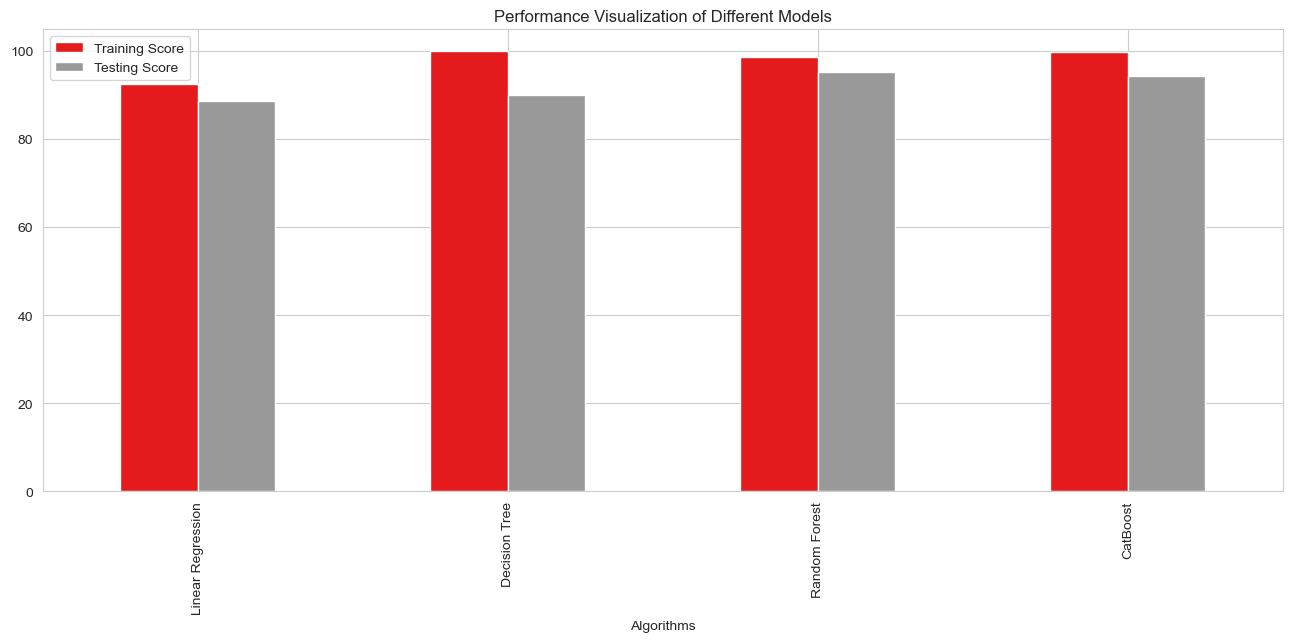

In [32]:
dfi.plot(x="Algorithms",y=['Training Score','Testing Score'], figsize=(16,6),kind='bar',
        title='Performance Visualization of Different Models',colormap='Set1')